In [1]:
from kervis.utils import Model
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [2]:
SP = Model("MUTAG", EdgeHistogram, "SVM")

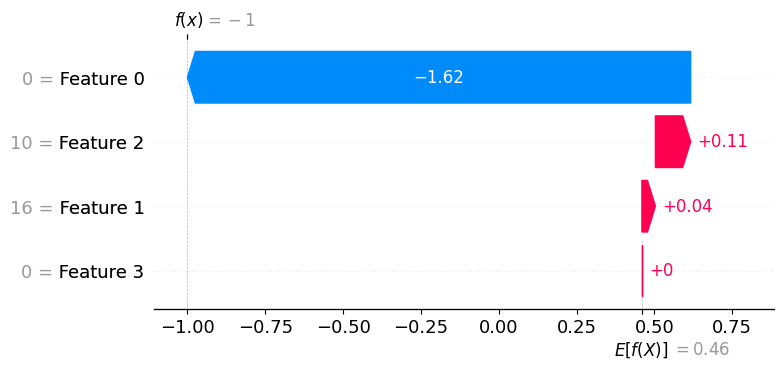

In [3]:
SP.waterfall_plot(0)

In [4]:
SP.kernel.attributes[0]

0

In [5]:
SP.dataset.graphs[1].edges(data="type")

EdgeDataView([(18, 19, 0), (18, 27, 0), (19, 20, 0), (20, 21, 0), (20, 25, 0), (21, 22, 0), (22, 23, 0), (23, 24, 0), (24, 25, 0), (25, 26, 0), (26, 27, 0), (26, 28, 1), (28, 29, 2), (28, 30, 1)])

In [6]:
features = SP.find_features(1, 0)
features

[(18, 19),
 (18, 27),
 (19, 20),
 (20, 21),
 (20, 25),
 (21, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26),
 (26, 27)]

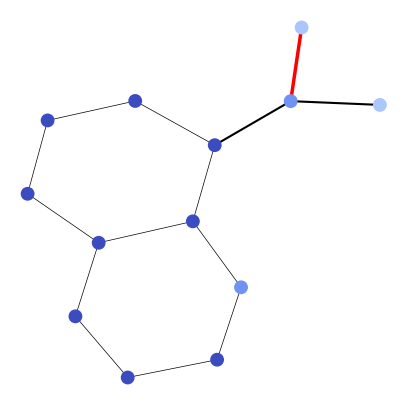

In [9]:
SP.highlight_features(1, 2)